# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:/Users/paul/Documents/Formation Data Analyst/Bootcamp/Module 2/Lab_2_Plotting_Multiple_Data_Series/liquor_store_sales.csv')
data

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.00,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.00,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.00,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.00,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.00,4.0,0.0
...,...,...,...,...,...,...,...,...,...
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46,59.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08,7.0,35.0
128352,2018,2,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.00,0.0,32.0
128353,2018,2,NaN,BC,BEER CREDIT,REF,0.00,0.0,-35.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [3]:
total=data.groupby('ItemType')[['RetailSales', 'RetailTransfers', 'WarehouseSales']].sum()
total

,RetailSales,RetailTransfers,WarehouseSales
ItemType,,,
BEER,209763.11,234924.44,2437617.32
DUNNAGE,0.00,0.00,-45331.00
KEGS,0.00,0.00,43558.00
LIQUOR,309847.85,334176.41,33173.32
NON-ALCOHOL,8109.97,9058.37,8656.72
REF,281.34,171.92,-6754.00
STR_SUPPLIES,995.98,3594.70,0.00
WINE,313400.42,340710.51,433009.47


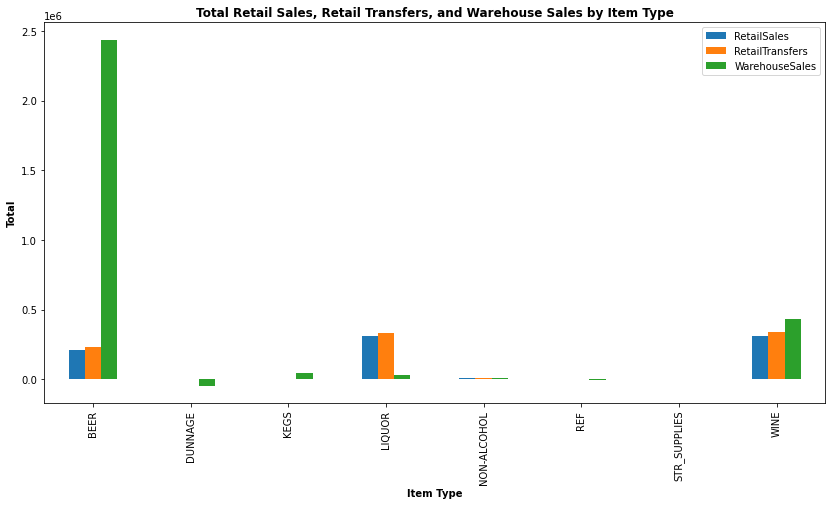

In [4]:
total.plot(kind='bar', figsize=(14,7))
plt.title('Total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type', fontweight='bold')
plt.xlabel('Item Type', fontweight='bold')
plt.ylabel('Total', fontweight='bold')
plt.show()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [5]:
supplier=data.groupby('Supplier')[['RetailSales', 'RetailTransfers', 'WarehouseSales']].sum()
supplier['All sales'] = supplier.sum(axis=1)
supp_10=supplier.sort_values('All sales', ascending=False).head(10)
supp_10

,RetailSales,RetailTransfers,WarehouseSales,All sales
Supplier,,,,
MILLER BREWING COMPANY,35022.63,39176.67,572623.41,646822.71
CROWN IMPORTS,26707.83,29561.67,579824.70,636094.20
ANHEUSER BUSCH INC,42559.14,47322.64,493856.19,583737.97
HEINEKEN USA,20923.17,23004.25,318812.59,362740.01
E & J GALLO WINERY,67455.63,75129.83,75594.99,218180.45
DIAGEO NORTH AMERICA INC,57656.36,62968.12,54252.88,174877.36
CONSTELLATION BRANDS,54472.51,60542.10,44968.76,159983.37
JIM BEAM BRANDS CO,39156.79,43020.59,2928.45,85105.83
THE WINE GROUP,25758.15,28462.05,26603.78,80823.98


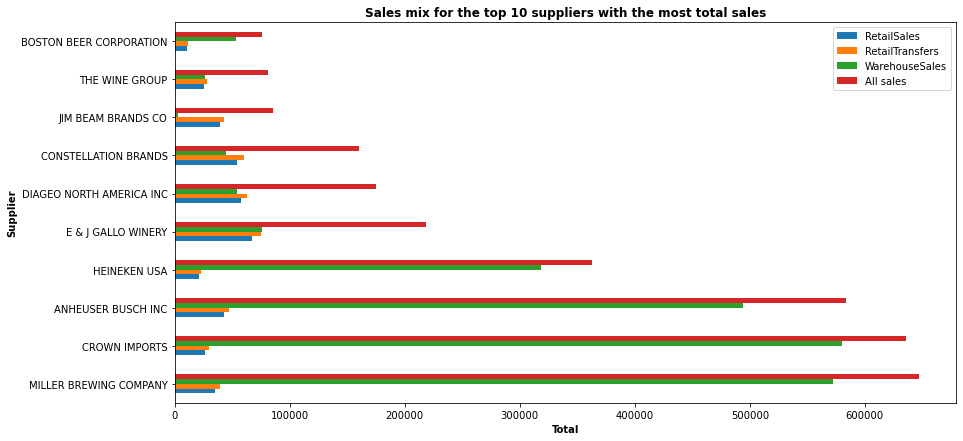

In [6]:
supp_10.plot(kind='barh', figsize=(14,7))
plt.title('Sales mix for the top 10 suppliers with the most total sales', fontweight='bold')
plt.xlabel('Total', fontweight='bold')
plt.ylabel('Supplier', fontweight='bold')
plt.show()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [7]:
avg_sales=data.groupby(['Year','Month']).mean()
avg_sales

RetailSales  RetailTransfers  WarehouseSales
Year Month                                              
2017 4         0.000000        15.707503        0.000000
     5         7.038838         7.421817       27.310548
     6         7.143914         6.950396       27.839069
     8         6.409991         6.584726       28.122641
     9         6.757254         6.419721       22.817909
     10        6.549021         6.827827       22.289367
     11        6.765496         7.103699       23.348862
     12        9.078241         8.353759       21.169463
2018 1         5.679413         5.574833       19.072137
     2         5.939247         6.050136       20.229658

KeyError: 'Month'

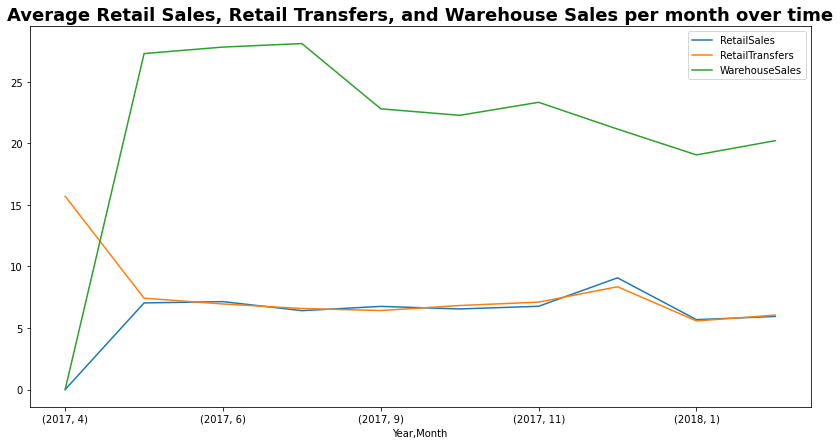

In [8]:
avg_sales.plot(figsize=(14,7))
plt.title('Average Retail Sales, Retail Transfers, and Warehouse Sales per month over time', fontsize=18, fontweight='bold')

plt.plot(avg_sales['Month'], avg_sales['RetailSales'],label ='Retail Sales')
plt.plot(avg_sales['Month'], avg_sales['RetailTransfers'],label ='Retail Transfers')
plt.plot(avg_sales['Month'], avg_sales['WarehouseSales'],label ='Warehouse Sales')

plt.legend(loc='best')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Amount of sales', fontweight='bold')
plt.show()

## 4. Plot the same information as above but as a bar chart.

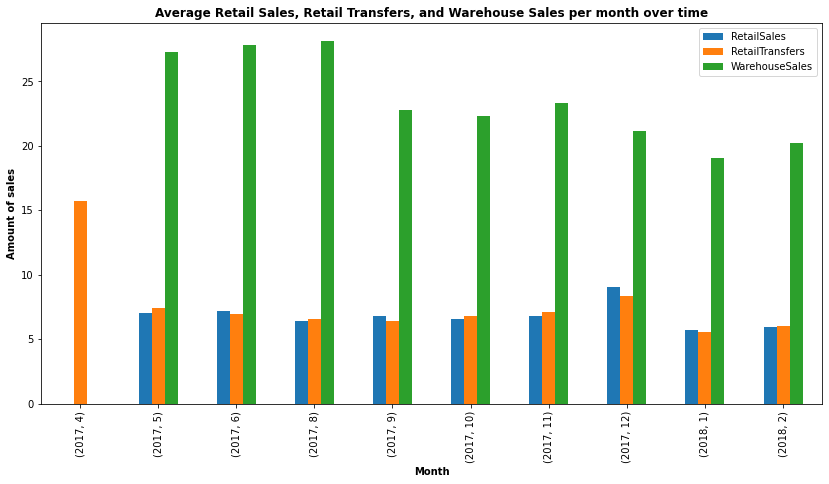

In [9]:
avg_sales.plot(kind='bar', figsize=(14,7))
plt.title('Average Retail Sales, Retail Transfers, and Warehouse Sales per month over time', fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Amount of sales', fontweight='bold')
plt.show()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [10]:
retail_item = pd.pivot_table(data, 
                             columns='ItemType', 
                             values='RetailSales',
                             index=['Year', 'Month'],
                             aggfunc=sum)
retail_item

ItemType        BEER  DUNNAGE  KEGS    LIQUOR  NON-ALCOHOL    REF  \
Year Month                                                          
2017 4          0.00      NaN   NaN      0.00         0.00   0.00   
     5      25023.24      NaN   NaN  35123.36          NaN    NaN   
     6      27863.26      0.0   0.0  35035.31      1209.23  30.60   
     8      23030.13      0.0   0.0  32186.04      1091.28  19.54   
     9      23852.76      0.0   0.0  32532.32       997.11  38.88   
     10     22583.78      0.0   0.0  32491.59       945.63  22.82   
     11     23341.14      0.0   0.0  35524.77      1005.19  63.11   
     12     28822.16      0.0   0.0  49522.28      1316.44  41.21   
2018 1      16606.33      0.0   0.0  28579.87       732.25  23.66   
     2      18640.31      0.0   0.0  28852.31       812.84  41.52   

ItemType    STR_SUPPLIES      WINE  
Year Month                          
2017 4              0.00      0.00  
     5               NaN  34546.89  
     6             89.22  33129.64  
     8             77.34  30707.45  
     9             94.64  32936.89  
     10            84.38  33108.76  
     11           106.06  38275.92  
     12           439.64  51492.76  
2018 1             56.94  29792.72  
     2             47.76  29409.39

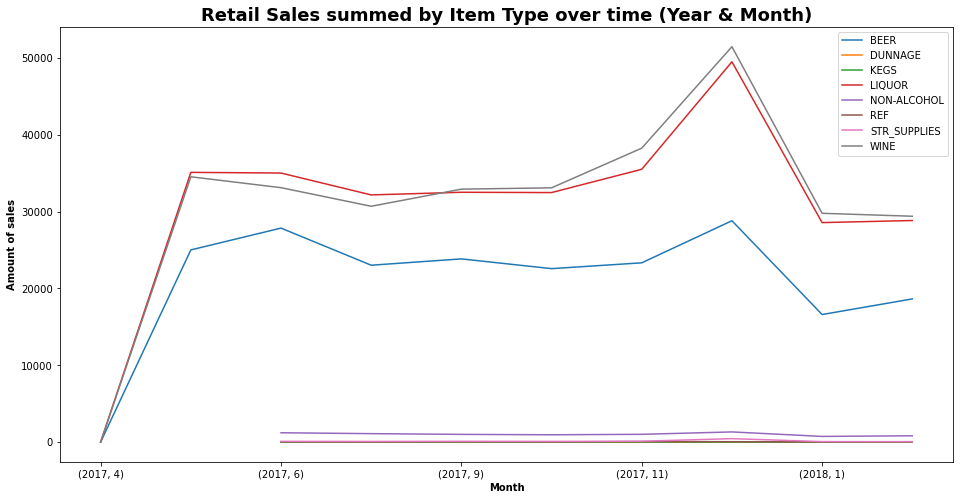

In [11]:
retail_item.plot(figsize=(16,8))
plt.title('Retail Sales summed by Item Type over time (Year & Month)', fontsize=18, fontweight='bold')
plt.legend(loc='best')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Amount of sales', fontweight='bold')
plt.show()

## 6. Plot the same information as above but as a bar chart.

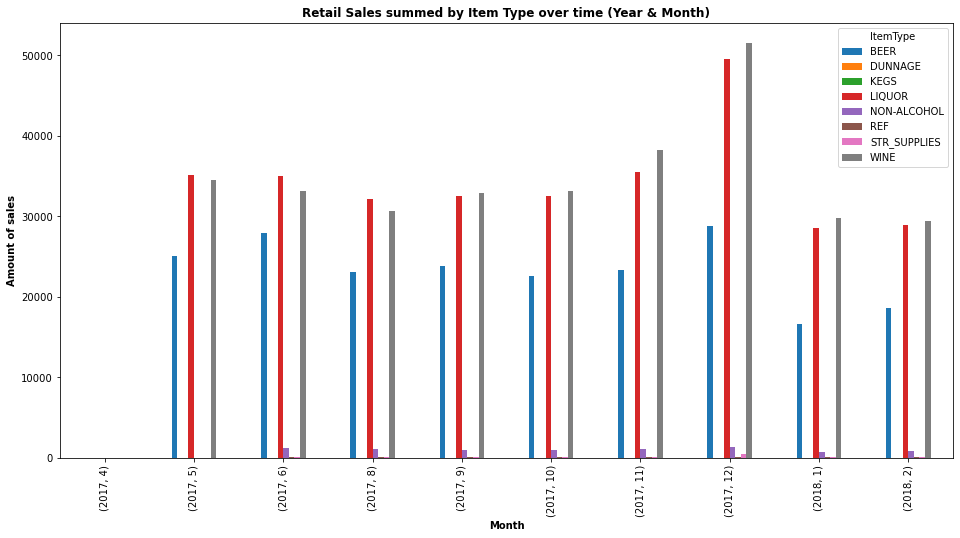

In [12]:
retail_item.plot(kind='bar', figsize=(16,8))
plt.title('Retail Sales summed by Item Type over time (Year & Month)', fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Amount of sales', fontweight='bold')
plt.show()

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

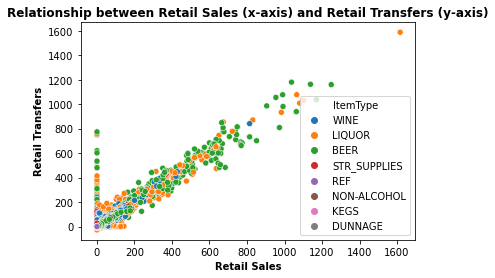

In [13]:
sns.scatterplot(data=data, x='RetailSales',y='RetailTransfers', hue='ItemType')
plt.title('Relationship between Retail Sales (x-axis) and Retail Transfers (y-axis)', fontweight='bold')
plt.xlabel('Retail Sales', fontweight='bold')
plt.ylabel('Retail Transfers', fontweight='bold')
plt.show()

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

In [ ]:
sns.pairplot(data, hue='ItemType')
plt.show()